In [39]:
import tensorflow as tf
from tensorflow.python.keras.applications.inception_v3 import preprocess_input
from tensorflow.python.keras.preprocessing import image
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [40]:
interpreter = tf.lite.Interpreter(model_path="edge/model/converted_quant_model_v2.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [41]:
def load_image_for_inceptionv3(path):
    img = image.load_img(path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    return x

img_path = 'test3.jpeg'
img2 = load_image_for_inceptionv3(img_path)

In [52]:
img2

array([[[[-1.        , -0.96862745, -0.9843137 ],
         [-1.        , -0.96862745, -0.9843137 ],
         [-1.        , -0.96862745, -0.9843137 ],
         ...,
         [-0.8980392 , -0.8901961 , -0.9372549 ],
         [-0.8901961 , -0.88235295, -0.92941177],
         [-0.8745098 , -0.8666667 , -0.9137255 ]],

        [[-1.        , -0.9764706 , -0.9843137 ],
         [-1.        , -0.9764706 , -0.9843137 ],
         [-1.        , -0.9764706 , -0.9843137 ],
         ...,
         [-0.9372549 , -0.92941177, -0.9764706 ],
         [-0.92941177, -0.92156863, -0.96862745],
         [-0.92156863, -0.9137255 , -0.9607843 ]],

        [[-1.        , -0.9764706 , -0.9843137 ],
         [-1.        , -0.9764706 , -0.9843137 ],
         [-1.        , -0.9764706 , -0.9843137 ],
         ...,
         [-0.9607843 , -0.9529412 , -0.99215686],
         [-0.9607843 , -0.9529412 , -0.99215686],
         [-0.9529412 , -0.94509804, -0.9843137 ]],

        ...,

        [[-1.        , -0.9843137 , -1

In [47]:
img = Image.open(img_path)
img = img.resize(size=(299, 299))
img = np.array(img).astype(np.float32).reshape(1,299,299,3)
#img = np.array(img, copy=True)
#img = preprocess_input(img)
#img = image.load_img(img_path, target_size=(299, 299))

In [53]:
img

array([[[[  0.,   4.,   2.],
         [  0.,   4.,   2.],
         [  0.,   4.,   2.],
         ...,
         [ 13.,  14.,   8.],
         [ 14.,  15.,   9.],
         [ 16.,  17.,  11.]],

        [[  0.,   3.,   2.],
         [  0.,   3.,   2.],
         [  0.,   3.,   2.],
         ...,
         [  8.,   9.,   3.],
         [  9.,  10.,   4.],
         [ 10.,  11.,   5.]],

        [[  0.,   3.,   2.],
         [  0.,   3.,   2.],
         [  0.,   3.,   2.],
         ...,
         [  5.,   6.,   1.],
         [  5.,   6.,   1.],
         [  6.,   7.,   2.]],

        ...,

        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   2.,   0.],
         ...,
         [148., 186., 101.],
         [148., 186., 103.],
         [148., 186., 103.]],

        [[  0.,   2.,   0.],
         [  0.,   2.,   0.],
         [  0.,   2.,   0.],
         ...,
         [145., 183., 100.],
         [145., 183., 100.],
         [145., 183., 100.]],

        [[  1.,   1.,   1.],
       

In [49]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()

In [50]:
prediction = interpreter.get_tensor(output_details[0]['index'])

In [44]:
with open('edge/inference-service/prediction_map.pickle', 'rb') as f:
    prediction_map = pickle.load(f)

725
empty


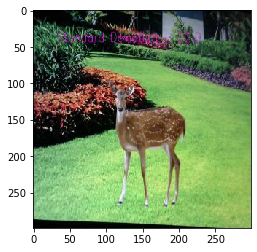

In [51]:
print(np.argmax(prediction))
print(prediction_map[np.argmax(prediction)])
plt.imshow(image.load_img(img_path))
plt.show()